# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [193]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [194]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [195]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [196]:
# Create a Beautiful Soup Object
mars_temperature_page = soup(html, "html.parser")

In [197]:
# Extract all rows of data
all_rows = mars_temperature_page.find_all("tr", class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [198]:
mars_data_columns = mars_temperature_page.find("tr")
mars_data_columns = mars_data_columns.text.replace("\n",",").strip(",")
mars_data_columns

'id,terrestrial_date,sol,ls,month,min_temp,pressure'

In [199]:
# Create an empty list
mars_data_list = []
# Loop through the scraped data to create a list of rows
for row in all_rows:
    line_item = row.text.replace("\n",",").strip(",")
    row_id,terrestrial_date,sol,ls,month,min_temp,pressure = line_item.split(",")
    mars_data_list.append({"id":row_id,"Terrestrial Date":terrestrial_date,"Sol":sol,"ls":ls,"Month":month,"Minimum Temp":min_temp,"Pressure":pressure})
mars_data_list

[{'id': '2',
  'Terrestrial Date': '2012-08-16',
  'Sol': '10',
  'ls': '155',
  'Month': '6',
  'Minimum Temp': '-75.0',
  'Pressure': '739.0'},
 {'id': '13',
  'Terrestrial Date': '2012-08-17',
  'Sol': '11',
  'ls': '156',
  'Month': '6',
  'Minimum Temp': '-76.0',
  'Pressure': '740.0'},
 {'id': '24',
  'Terrestrial Date': '2012-08-18',
  'Sol': '12',
  'ls': '156',
  'Month': '6',
  'Minimum Temp': '-76.0',
  'Pressure': '741.0'},
 {'id': '35',
  'Terrestrial Date': '2012-08-19',
  'Sol': '13',
  'ls': '157',
  'Month': '6',
  'Minimum Temp': '-74.0',
  'Pressure': '732.0'},
 {'id': '46',
  'Terrestrial Date': '2012-08-20',
  'Sol': '14',
  'ls': '157',
  'Month': '6',
  'Minimum Temp': '-74.0',
  'Pressure': '740.0'},
 {'id': '57',
  'Terrestrial Date': '2012-08-21',
  'Sol': '15',
  'ls': '158',
  'Month': '6',
  'Minimum Temp': '-78.0',
  'Pressure': '740.0'},
 {'id': '68',
  'Terrestrial Date': '2012-08-22',
  'Sol': '16',
  'ls': '158',
  'Month': '6',
  'Minimum Temp': '-77.

In [200]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data_df = pd.DataFrame(mars_data_list)

In [201]:
# Confirm DataFrame was created successfully
mars_data_df

,id,Terrestrial Date,Sol,ls,Month,Minimum Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [202]:
# Examine data type of each column
mars_data_df.dtypes

id                  object
Terrestrial Date    object
Sol                 object
ls                  object
Month               object
Minimum Temp        object
Pressure            object
dtype: object

In [203]:
# Change data types for data analysis
mars_data_df["Terrestrial Date"] = pd.to_datetime(mars_data_df["Terrestrial Date"])
mars_data_df["Sol"] = pd.to_numeric(mars_data_df["Sol"])
mars_data_df["ls"] = pd.to_numeric(mars_data_df["ls"])
mars_data_df["Month"] = pd.to_numeric(mars_data_df["Month"])
mars_data_df["Minimum Temp"] = pd.to_numeric(mars_data_df["Minimum Temp"])
mars_data_df["Pressure"] = pd.to_numeric(mars_data_df["Pressure"])

In [204]:
# Confirm type changes were successful by examining data types again
mars_data_df.dtypes

id                          object
Terrestrial Date    datetime64[ns]
Sol                          int64
ls                           int64
Month                        int64
Minimum Temp               float64
Pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [205]:
# 1. How many months are there on Mars?
mars_data_df["Month"].max()

12

In [206]:
# 2. How many Martian days' worth of data are there?
len(mars_data_df["Sol"].unique())

1867

In [207]:
# 3. What is the average low temperature by month?
monthly_avg_temp = mars_data_df.groupby(mars_data_df["Month"]).mean() ["Minimum Temp"]
monthly_avg_temp

Month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: Minimum Temp, dtype: float64

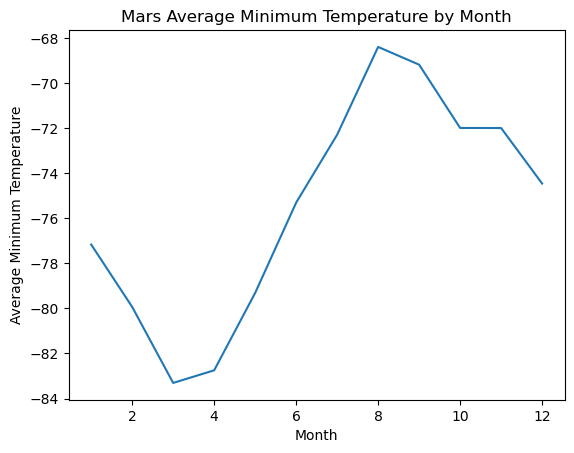

In [208]:
# Plot the average temperature by month
plt.plot(monthly_avg_temp)
plt.title("Mars Average Minimum Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature")
plt.show()

In [209]:
# Identify the coldest and hottest months in Curiosity's location
monthly_avg_temp.loc[monthly_avg_temp.values == monthly_avg_temp.values.min()]

Month
3   -83.307292
Name: Minimum Temp, dtype: float64

In [210]:
monthly_avg_temp.loc[monthly_avg_temp.values == monthly_avg_temp.values.max()]

Month
8   -68.382979
Name: Minimum Temp, dtype: float64

In [211]:
# 4. Average pressure by Martian month
monthly_avg_press = mars_data_df.groupby(mars_data_df["Month"]).mean() ["Pressure"]
monthly_avg_press

Month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64

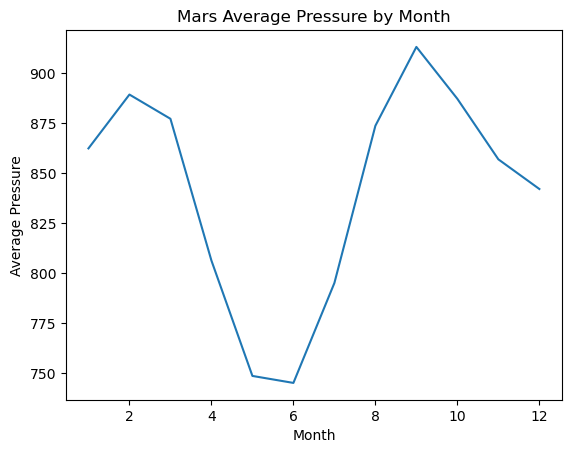

In [212]:
# Plot the average pressure by month
plt.plot(monthly_avg_press)
plt.title("Mars Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.show()

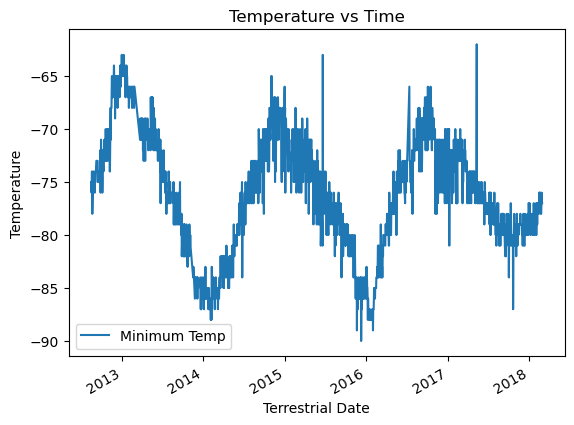

In [213]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_data_df.plot("Terrestrial Date", "Minimum Temp", ylabel="Temperature", title="Temperature vs Time")
plt.show()

In [214]:
mars_july = mars_data_df.loc[mars_data_df["Month"] == 7, "Terrestrial Date"]
mars_sept = mars_data_df.loc[mars_data_df["Month"] == 9, "Terrestrial Date"]

In [215]:
terrestrial_year = mars_data_df["Terrestrial Date"].dt.year
terrestrial_year_list = terrestrial_year.unique()
terrestrial_year_list

array([2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [216]:
sept_year_list = []

for year in terrestrial_year_list:
    for tdate in mars_sept:
        if year == tdate.year:
            print(tdate)
            sept_year_list.append(tdate)
            if year == tdate.year:
                break

2013-01-08 00:00:00
2014-11-25 00:00:00
2015-01-01 00:00:00
2016-10-12 00:00:00


In [217]:
july_year_list = []

for year in terrestrial_year_list:
    for tdate in mars_july:
        if year == tdate.year:
            print(tdate)
            july_year_list.append(tdate)
            if year == tdate.year:
                break

2012-09-30 00:00:00
2014-08-18 00:00:00
2016-07-12 00:00:00


In [218]:
july_year_list[1] - july_year_list[0]

Timedelta('687 days 00:00:00')

In [219]:
july_year_list[2] - july_year_list[1]

Timedelta('694 days 00:00:00')

In [220]:
sept_year_list[1]-sept_year_list[0]

Timedelta('686 days 00:00:00')

In [221]:
sept_year_list[3]-sept_year_list[1]

Timedelta('687 days 00:00:00')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

When using the terrestrial date during the first entry of a new month and subtracting the previous first entry of the same month from a past year (or about 2 years), results for month 7 were 687 and 694 days. Results for month 9 were 686 and 687 days. The average time between dates was 688.5 days. The temperature vs time plot also shows about a 2 year cycle between peaks and valleys in temperature. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [222]:
# Write the data to a CSV
mars_data_df.to_csv("mars_data.csv")

In [223]:
browser.quit()